# Principal Component Analysis - New York Weather
I already did principal component analysis for GJ weather analysis so I am going to do NEw york weather data for one month now. 

## Import New York weather and Create Heat Map
Lets import the New York data and check out the correlation before we do the PCA

/var/folders/9n/fytcl6v9593794xbh06tb2f80000gn/T/ipykernel_73136/2743685474.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


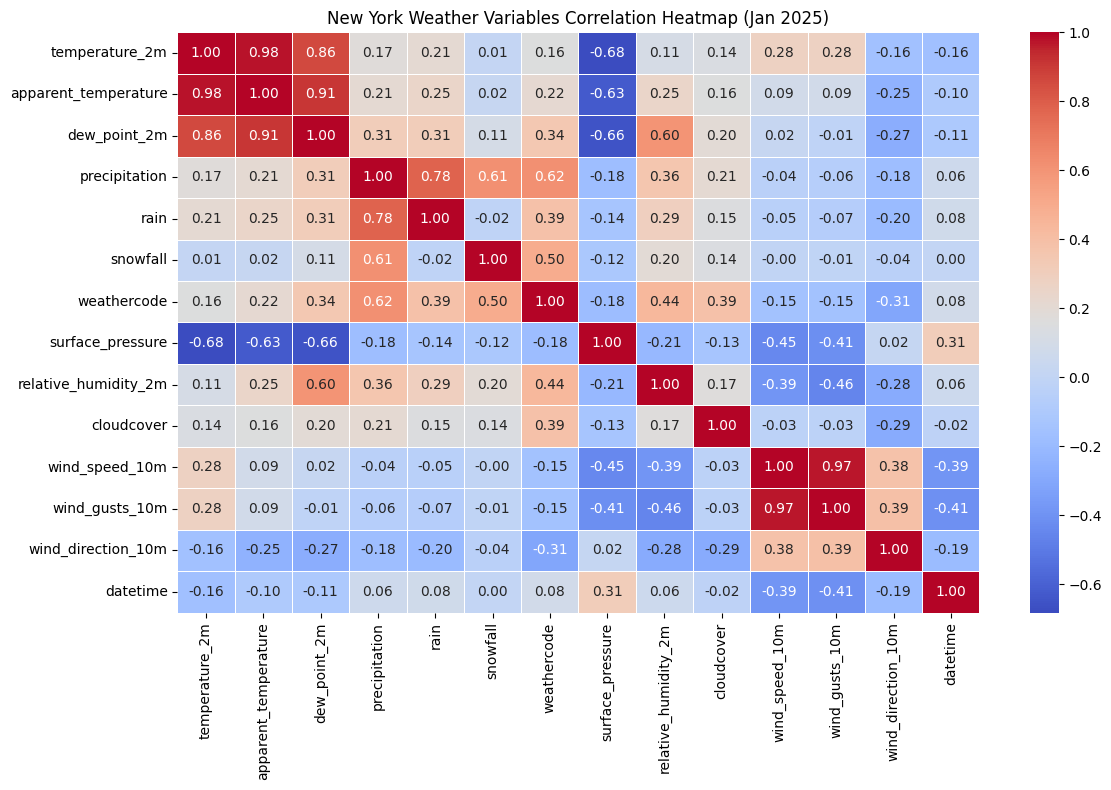

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1️⃣ Import New York weather data
# --------------------------
latitude = 40.7128
longitude = -74.0060

url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    "&start_date=2025-01-01&end_date=2025-01-31"
    "&hourly=temperature_2m,apparent_temperature,dew_point_2m,"
    "precipitation,rain,snowfall,weathercode,"
    "surface_pressure,relative_humidity_2m,cloudcover,"
    "wind_speed_10m,wind_gusts_10m,wind_direction_10m"
    "&timezone=America%2FNew_York"
)

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data["hourly"])
df["datetime"] = pd.to_datetime(df["time"])
df.drop(columns=["time"], inplace=True)

# Convert all numeric columns to float (for correlation)
df = df.apply(pd.to_numeric, errors="ignore")

# --------------------------
# 2️⃣ Compute correlation matrix
# --------------------------
corr = df.corr(numeric_only=True)

# --------------------------
# 3️⃣ Plot heatmap
# --------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("New York Weather Variables Correlation Heatmap (Jan 2025)")
plt.tight_layout()
plt.show()


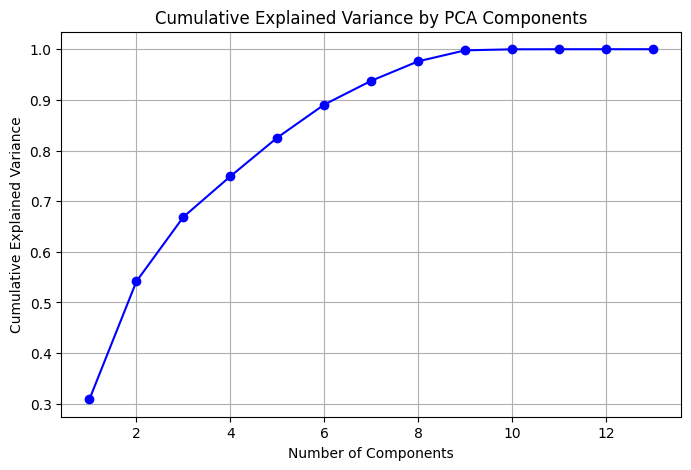

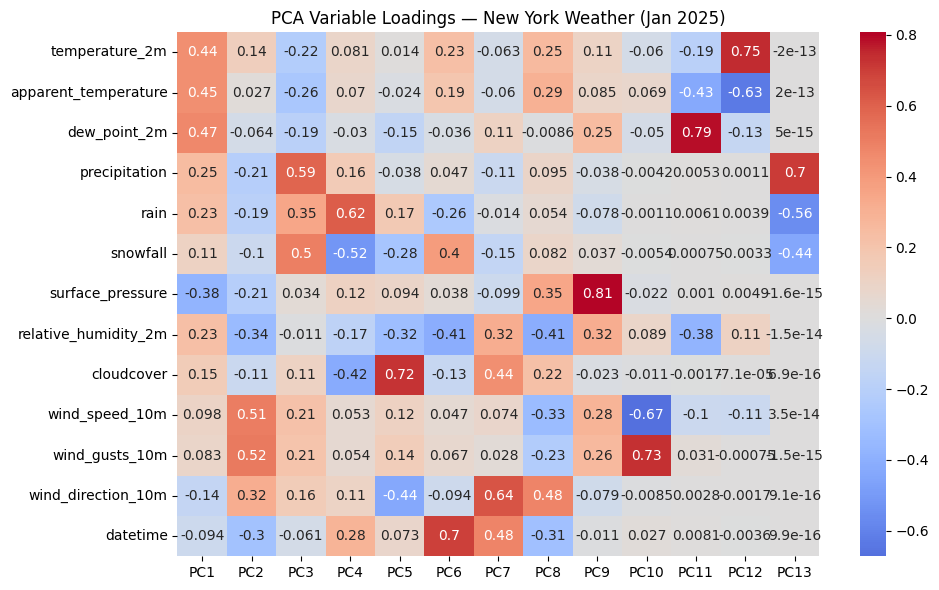

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Prepare numeric data ---
df_numeric = df.select_dtypes(include='number').dropna()
df_numeric = df_numeric.drop(columns=['weathercode'], errors='ignore')

# --- Standardize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# --- Run PCA ---
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# --- Explained variance plot ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', color='b')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# --- PCA loadings heatmap ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(df_numeric.columns))],
    index=df_numeric.columns
)

plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", center=0, annot=True)
plt.title("PCA Variable Loadings — New York Weather (Jan 2025)")
plt.tight_layout()
plt.show()


### Results Summary: 
Since we are dealing with a lot more variables compared to the Grand Junction Weather Data, we naturally will need more principal components in order to explain more of the data. In the skree graph, we can see the first two components will cover 0.5 of the variance. However we will need 6 principal components to be able to explain 90% of the data. The loadings tell us generally how much of each variable we are covering with each principal component. The first one covers a lot of the temperatures, then the wind speeds, precipitation and so on. 

## NFL Data - Quarterback statistics
This dataset has every quarterback for every year. Lets first take a look at a correlation heat map for the variables.

✅ Successfully loaded Career_Stats_Passing.csv
✅ Filtered rows — 4239 remaining


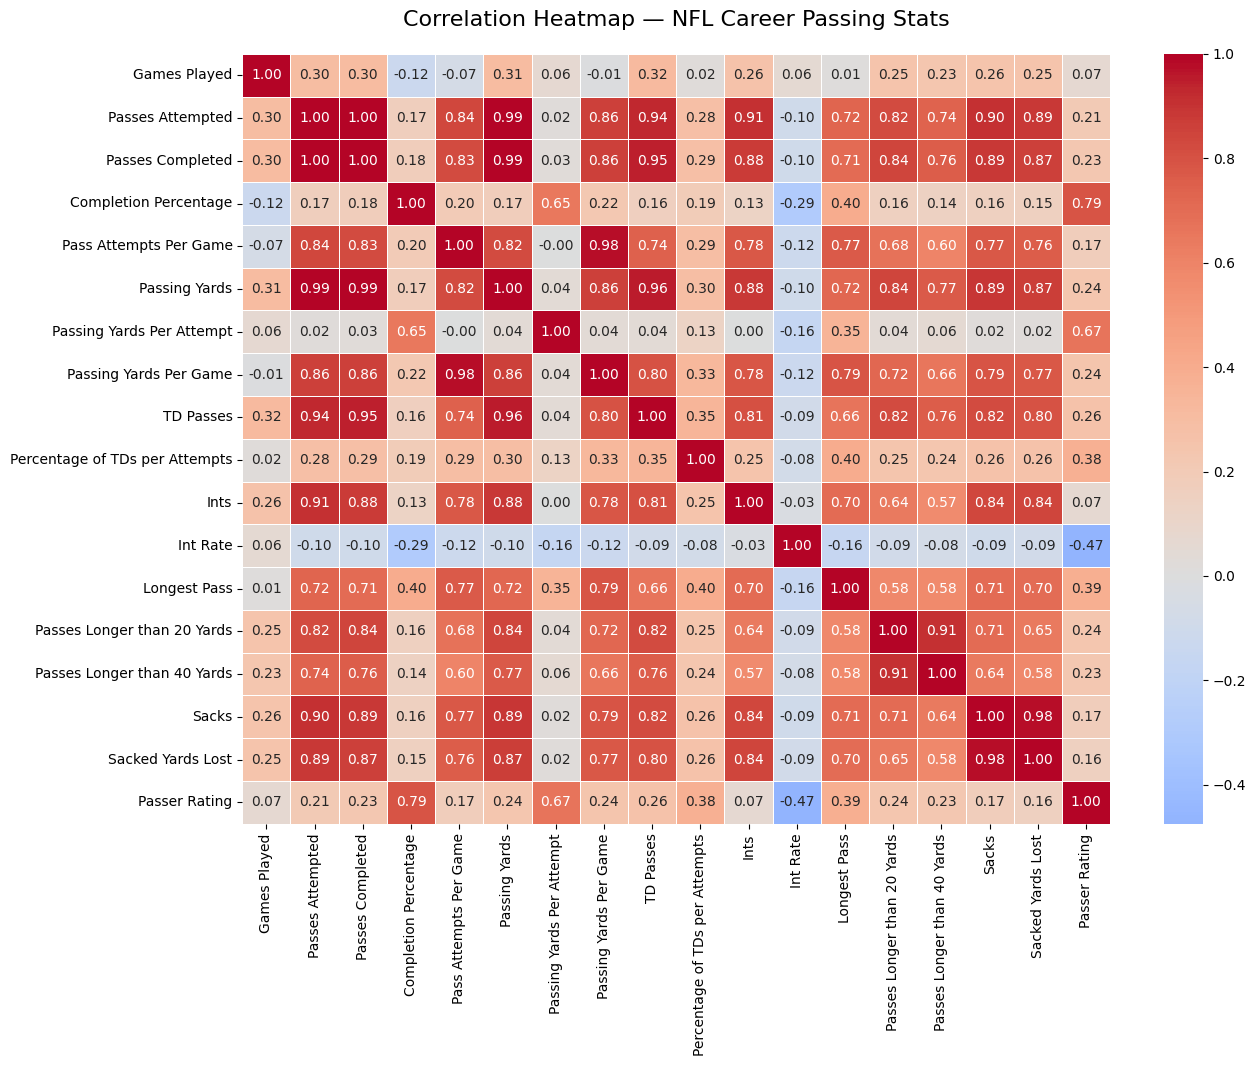

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Load dataset ---
df = pd.read_csv("Career_Stats_Passing.csv")
print("✅ Successfully loaded Career_Stats_Passing.csv")

# --- Convert "Passes Attempted" to numeric and filter ---
df["Passes Attempted"] = (
    df["Passes Attempted"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
df["Passes Attempted"] = pd.to_numeric(df["Passes Attempted"], errors="coerce")

# Drop rows where "Passes Attempted" is NaN or 0
df = df[df["Passes Attempted"].fillna(0) > 0]
print(f"✅ Filtered rows — {len(df)} remaining")

# --- Select numeric columns only ---
numeric_cols = [
    "Games Played", "Passes Attempted", "Passes Completed",
    "Completion Percentage", "Pass Attempts Per Game",
    "Passing Yards", "Passing Yards Per Attempt",
    "Passing Yards Per Game", "TD Passes",
    "Percentage of TDs per Attempts", "Ints", "Int Rate",
    "Longest Pass", "Passes Longer than 20 Yards",
    "Passes Longer than 40 Yards", "Sacks",
    "Sacked Yards Lost", "Passer Rating"
]

# Ensure all numeric columns are converted properly
for col in numeric_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace(",", "")
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

numeric_df = df[numeric_cols].dropna()

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Plot correlation heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,        # show numeric correlation values
    fmt=".2f",         # 2 decimal places
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap — NFL Career Passing Stats", fontsize=16, pad=20)
plt.show()


## PCA - NFL Data
Lets now do a PCA on the data. 

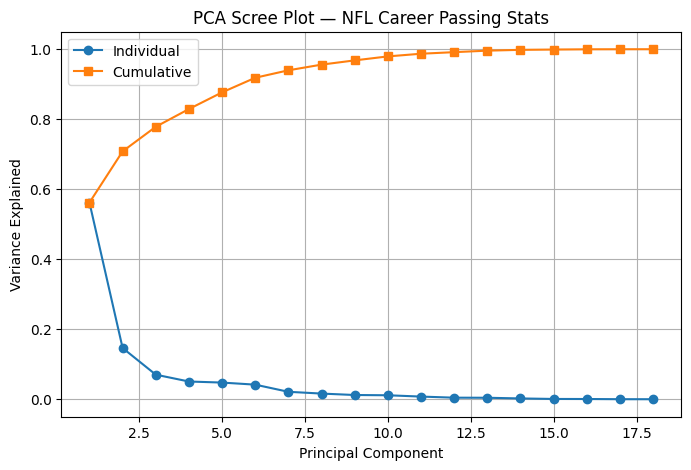

🔹 Explained variance by first few components:
PC1: 0.562 (56.2% cumulative)
PC2: 0.146 (70.8% cumulative)
PC3: 0.070 (77.8% cumulative)
PC4: 0.051 (82.9% cumulative)
PC5: 0.048 (87.7% cumulative)

🔹 Feature loadings for first 3 components:


,PC1,PC2,PC3
Games Played,0.076145,-0.104140,0.791108
Passes Attempted,0.307277,-0.075586,0.049326
Passes Completed,0.306687,-0.066658,0.066503
Completion Percentage,0.082334,0.517006,-0.023707
Pass Attempts Per Game,0.274656,-0.028609,-0.340857
Passing Yards,0.307711,-0.063210,0.073703
Passing Yards Per Attempt,0.035359,0.492465,0.205206
Passing Yards Per Game,0.285327,-0.005454,-0.276992
TD Passes,0.293054,-0.050937,0.114848
Percentage of TDs per Attempts,0.115061,0.172776,-0.106149


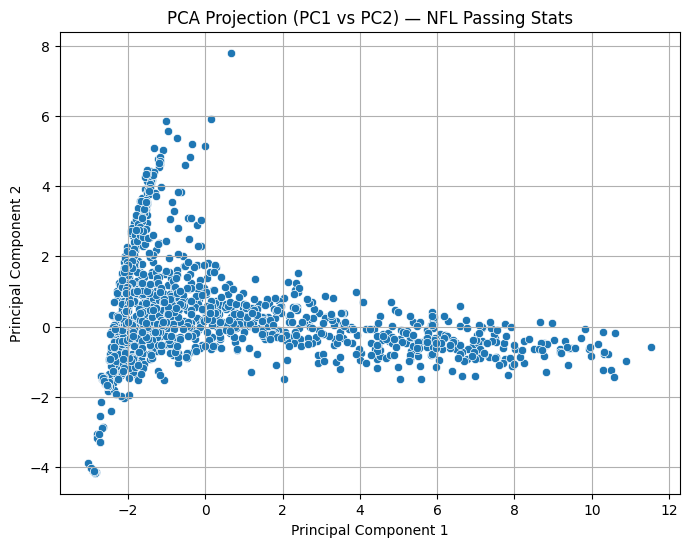

In [9]:
# --- PCA on NFL Passing Stats ---
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Use the same numeric columns you used for the correlation
numeric_cols = [
    "Games Played", "Passes Attempted", "Passes Completed",
    "Completion Percentage", "Pass Attempts Per Game",
    "Passing Yards", "Passing Yards Per Attempt",
    "Passing Yards Per Game", "TD Passes",
    "Percentage of TDs per Attempts", "Ints", "Int Rate",
    "Longest Pass", "Passes Longer than 20 Yards",
    "Passes Longer than 40 Yards", "Sacks",
    "Sacked Yards Lost", "Passer Rating"
]

numeric_df = df[numeric_cols].dropna()

# --- Standardize data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# --- Fit PCA ---
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# --- Explained variance ---
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# --- Scree plot ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Individual')
plt.plot(range(1, len(explained_var)+1), cum_var, marker='s', label='Cumulative')
plt.title("PCA Scree Plot — NFL Career Passing Stats")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

# --- PCA loadings (how much each feature contributes to each component) ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_var))],
    index=numeric_cols
)

print("🔹 Explained variance by first few components:")
for i, var in enumerate(explained_var[:5]):
    print(f"PC{i+1}: {var:.3f} ({cum_var[i]*100:.1f}% cumulative)")

print("\n🔹 Feature loadings for first 3 components:")
display(loadings.iloc[:, :3])

# --- Optional 2D PCA visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])
plt.title("PCA Projection (PC1 vs PC2) — NFL Passing Stats")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
